In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


## RF의 Feature Importance를 사용하여 수익률에 유의적인 변수 선택하기.
1. Feature Importance를 사용하여 Return에 유의적인 변수 선택하기.
2. 선택된 변수와 뉴스 정보량, TR/ATR(14)를 이용해서 RF 예측 분류하기.

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'cmr10',
 'cmmi10',
 'DejaVu Sans Mono',
 'cmb10',
 'cmtt10',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeFourSym',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmss10',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Serif',
 'Liberation Mono',
 'NanumGothic',
 'NanumBarunGothic',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Sans',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'NanumGothic',
 'Liberation Sans',
 'Humor Sans',
 'NanumMyeongjo',
 'NanumSquare

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import time
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
top20 = pd.read_csv("/content/drive/Shared drives/2020-2 경제학특강4/financedata.csv").head(20)
top20


,순위,종목코드,종목명,현재가,대비,등락률,거래량,거래대금,시가,고가,저가,시가총액,시가총액비중(%),상장주식수,외국인 보유주식수,외국인 지분율(%),총카운트
0,1,005930,삼성전자,"60,300","1,800",3.1,"20,639,475","1,232,654,470,000","59,000","60,300","58,800","359,977,887,765,000",18.10,"5,969,782,550",NaN,NaN,2506.0
1,2,000660,SK하이닉스,"86,100","2,900",3.5,"4,082,325","348,613,876,600","84,100","86,200","83,300","62,681,003,626,500",3.15,"728,002,365",NaN,NaN,NaN
2,3,207940,삼성바이오로직스,"781,000","48,000",6.6,"447,218","347,396,415,000","767,000","787,000","757,000","51,674,865,000,000",2.60,"66,165,000",NaN,NaN,NaN
3,4,035420,NAVER,"299,000",500,0.2,"1,082,388","320,599,626,000","295,000","302,000","291,500","49,114,755,105,000",2.47,"164,263,395",NaN,NaN,NaN
4,5,051910,LG화학,"677,000","27,000",4.2,"446,583","298,622,140,000","663,000","677,000","656,000","47,791,016,211,000",2.40,"70,592,343",NaN,NaN,NaN
5,6,005935,삼성전자우,"53,500","1,300",2.5,"2,026,073","107,478,510,900","52,400","53,500","52,400","44,024,438,450,000",2.21,"822,886,700",NaN,NaN,NaN
6,7,005380,현대차,"175,000","3,500",2.0,"1,299,430","226,049,073,000","173,500","175,000","172,500","37,391,932,725,000",1.88,"213,668,187",NaN,NaN,NaN
7,8,068270,셀트리온,"272,000","1,500",0.6,"965,754","261,672,821,000","273,000","274,000","266,500","36,718,296,736,000",1.85,"134,993,738",NaN,NaN,NaN
8,9,006400,삼성SDI,"484,000","24,500",5.3,"727,072","347,585,233,816","472,000","484,000","466,500","33,282,032,520,000",1.67,"68,764,530",NaN,NaN,NaN
9,10,035720,카카오,"363,000","3,500",1.0,"1,061,367","382,380,889,000","359,000","368,500","353,000","32,033,958,297,000",1.61,"88,247,819",NaN,NaN,NaN


In [ ]:
START_DATE = '2019-12-01'
END_DATE = '2020-11-01'

- '삼성전자우'의 데이터가 소실이 많아서 그건 빼고 진행.
- 1위 ~ 5위
- 6위인 삼성전자우는 돌리면 error(정보 소실이 너무 큼)



com(-2),개인순(0),기관순(-1),외국인순(0) : 삼성전자_completed
삼성전자_RF_accuracy : 0.8333333333333334



,삼성전자
외국인순(0),0.505513
TR/ATR,0.092849
count,0.067803
com(-2),-0.068592
기관순(-1),-0.252234
개인순(0),-0.606252


linear corr: 
com(-1),개인순(0),기관순(-2),외국인순(0) : SK하이닉스_completed
SK하이닉스_RF_accuracy : 0.7692307692307693



,SK하이닉스
외국인순(0),0.155466
com(-1),0.153010
TR/ATR,0.062313
count,0.061722
기관순(-2),-0.185845
개인순(0),-0.219956


linear corr: 
posneg(3),개인순(1),기관순(1),외국인순(-2) : 삼성바이오로직스_completed
삼성바이오로직스_RF_accuracy : 0.8



,삼성바이오로직스
기관순(1),0.089978
count,0.059907
개인순(1),0.014681
TR/ATR,0.003563
posneg(3),-0.261736
외국인순(-2),-0.334548


linear corr: 
posneg(0),개인순(0),기관순(-1),외국인순(-1) : NAVER_completed
NAVER_RF_accuracy : 0.4375



,NAVER
외국인순(-1),0.167658
TR/ATR,0.042019
count,-0.001881
posneg(0),-0.049646
개인순(0),-0.077686
기관순(-1),-0.264240


linear corr: 
com(0),개인순(0),기관순(-1),외국인순(2) : LG화학_completed
LG화학_RF_accuracy : 0.6923076923076923



,LG화학
외국인순(2),0.062423
TR/ATR,0.015346
com(0),-0.028018
기관순(-1),-0.126879
개인순(0),-0.134818
count,-0.170906


linear corr: 


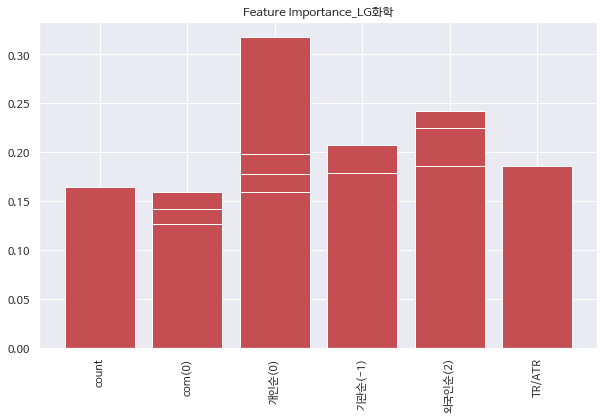

In [ ]:
# 뉴스의 극성 점수/개인순매수비율/기관순매수비율/외국인순매수비율 변수의 중요도 살펴보기.
# 선택된 변수와 거래량, TR/ATR 지표를 변수로 삼고 RandomForest 모형 이용해서 주가 상승/하락 분류  
# 1~5위


from sklearn.decomposition import PCA 

RF_result = {}
record = pd.DataFrame()
path = "/content/drive/Shareddrives/2020-2 경제학특강4/"
for t in top20['종목명'][0:5]:
  data = pd.read_csv(path+"합체 데이터/%s_합체.csv" %t).drop(columns = ['Unnamed: 0'])
  df = data.copy()
  # df['Ret'] = df['Close'].pct_change()
  RFdata = df.copy()
  for w in range(-3,4):
    df['com('+str(w)+')'] = df.compound.shift(w)
    df['posneg('+str(w)+')'] = df.posneg.shift(w)
  for k in range(-3,4):
    df['개인순('+str(k)+')'] = df['개인 순매수비율'].shift(k)-df['개인 순매수비율'].shift(k+1)
  for v in range(-3,4):
    df['기관순('+str(v)+')'] = df['기관 순매수비율'].shift(v)-df['기관 순매수비율'].shift(v+1)
  for z in range(-3,4):
    df['외국인순('+str(z)+')'] = df['외국인 순매수비율'].shift(z)-df['외국인 순매수비율'].shift(z+1)
  df0 = df.iloc[:,3]
  df1 = df.iloc[:,25:39]; df11 = pd.concat([df0,df1], axis=1).dropna()
  df2 = df.iloc[:,39:46]; df21 = pd.concat([df0,df2], axis=1).dropna()
  df3 = df.iloc[:,46:53]; df31 = pd.concat([df0,df3], axis=1).dropna()
  df4 = df.iloc[:,53:60]; df41 = pd.concat([df0,df4], axis=1).dropna()

  X = df11.iloc[:,1:]
  y = np.sign(df11['Change']) 

  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1)

  clf_rf = RandomForestClassifier()  # instantiation
  clf_rf.fit(Xtrain, ytrain )   # fitting
  feature_imp = clf_rf.feature_importances_

  feature_imp_series = pd.Series(feature_imp, index=Xtrain.columns)
  feature_imp_series.sort_values(axis=0, ascending=False, inplace=True)
  name1 = list(feature_imp_series.index)
  rate1 = list(feature_imp_series.values)
 
  X2 = df21.iloc[:,1:]
  y2 = np.sign(df21['Change']) 

  Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2,test_size = 0.1)

  clf_rf2 = RandomForestClassifier()  # instantiation
  clf_rf2.fit(Xtrain2, ytrain2 )   # fitting
  feature_imp2 = clf_rf2.feature_importances_

  feature_imp_series2 = pd.Series(feature_imp2, index=Xtrain2.columns)
  feature_imp_series2.sort_values(axis=0, ascending=False, inplace=True)
  name2 = list(feature_imp_series2.index)
  rate2 = list(feature_imp_series2.values)
 
  X3 = df31.iloc[:,1:]
  y3 = np.sign(df31['Change']) 

  Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, test_size = 0.1)

  clf_rf3 = RandomForestClassifier()  # instantiation
  clf_rf3.fit(Xtrain3, ytrain3 )   # fitting
  feature_imp3 = clf_rf3.feature_importances_

  feature_imp_series3 = pd.Series(feature_imp3, index=Xtrain3.columns)
  feature_imp_series3.sort_values(axis=0, ascending=False, inplace=True)
  name3 = list(feature_imp_series3.index)
  rate3 = list(feature_imp_series3.values)
 
  X4 = df41.iloc[:,1:]
  y4 = np.sign(df41['Change']) 

  Xtrain4, Xtest4, ytrain4, ytest4 = train_test_split(X4, y4, test_size = 0.1)

  clf_rf4 = RandomForestClassifier()  # instantiation
  clf_rf4.fit(Xtrain4, ytrain4 )   # fitting
  feature_imp4 = clf_rf4.feature_importances_

  feature_imp_series4 = pd.Series(feature_imp4, index=Xtrain4.columns)
  feature_imp_series4.sort_values(axis=0, ascending=False, inplace=True)
  name4 = list(feature_imp_series4.index)
  rate4 = list(feature_imp_series4.values)
  
  print(f'{name1[0]},{name2[0]},{name3[0]},{name4[0]} : {t}_completed')
  r_list = [name1[0],name2[0],name3[0], name4[0]]
  record.insert(loc =0, column = t, value = r_list)

  RFdata[name1[0]] = df[name1[0]]
  RFdata[name2[0]] = df[name2[0]]
  RFdata[name3[0]] = df[name3[0]]
  RFdata[name4[0]] = df[name4[0]]
  RFdata['TR/ATR'] = df['TR']/df['ATR_14']
  RF_copy1 = RFdata.iloc[:,[3,11]]
  RF_copy2 = RFdata.iloc[:,25:]
  RF_df = pd.concat([RF_copy1,RF_copy2], axis = 1).dropna()
# RF_df

  X_rf = RF_df.iloc[:,1:]
  y_rf = np.sign(RF_df['Change']) 

  Xtrain_rf, Xtest_rf, ytrain_rf, ytest_rf = train_test_split(X_rf, y_rf, test_size = 0.1)

  clf_rfc_rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
  clf_rfc_rf.fit(Xtrain_rf, ytrain_rf)
  yhat_rfc_rf = clf_rfc_rf.predict(Xtest_rf)
  acc = accuracy_score(yhat_rfc_rf, ytest_rf)
  print(f'{t}_RF_accuracy : {acc}\n')

  x_corr = X_rf.corrwith(y_rf)
  x_corr.sort_values(axis = 0, ascending = False)
  display(pd.DataFrame({t: x_corr.sort_values(axis = 0, ascending = False)}))
  
  print("linear corr: ", )
  RF_result[t] = acc

  feature_imp_rf = clf_rfc_rf.feature_importances_
  feature_imp_series_rf = pd.Series(feature_imp_rf, index=Xtrain_rf.columns)
  feature_imp_series_rf.sort_values(axis=0, ascending=False, inplace=True)

  name_rf = list(feature_imp_series_rf.index)
  rate_rf = list(feature_imp_series_rf.values)
  
  importance_show = pd.DataFrame({'feature':name_rf, 'importance':rate_rf})

  plt.rc('font', family='NanumBarunGothic') 
  plt.rcParams['figure.figsize'] = (10, 6)
  plt.bar(range(len(feature_imp_rf)), feature_imp_rf, color='r')
  plt.xticks(range(len(feature_imp_rf)), Xtrain_rf.columns, rotation='vertical')
  plt.title('Feature Importance_'+t)
  plt.savefig(path+'output_%s.png' %t, bbox_inches='tight')

# importance_show


- 7위 ~ 20위 추가

com(3),개인순(-1),기관순(-1),외국인순(-1) : 현대차_completed
현대차_RF_accuracy : 0.5833333333333334



,현대차
개인순(-1),0.197868
com(3),0.117227
TR/ATR,0.001330
count,-0.031741
외국인순(-1),-0.099455
기관순(-1),-0.235783


com(3),개인순(2),기관순(1),외국인순(3) : 셀트리온_completed
셀트리온_RF_accuracy : 0.42857142857142855



,셀트리온
외국인순(3),0.321022
개인순(2),0.177153
기관순(1),0.024773
count,-0.037998
TR/ATR,-0.062912
com(3),-0.080872


com(0),개인순(-2),기관순(0),외국인순(-1) : 삼성SDI_completed
삼성SDI_RF_accuracy : 0.5833333333333334



,삼성SDI
기관순(0),0.209738
개인순(-2),0.197096
외국인순(-1),0.120883
TR/ATR,0.117777
count,-0.022170
com(0),-0.063166


com(-3),개인순(3),기관순(-1),외국인순(3) : 카카오_completed
카카오_RF_accuracy : 0.4166666666666667



,카카오
개인순(3),0.172524
count,0.068444
com(-3),-0.000827
TR/ATR,-0.041955
기관순(-1),-0.074473
외국인순(3),-0.166382


com(0),개인순(-1),기관순(-1),외국인순(-1) : LG생활건강_completed
LG생활건강_RF_accuracy : 0.46153846153846156



,LG생활건강
개인순(-1),0.216994
com(0),0.141013
count,-0.030694
외국인순(-1),-0.033853
TR/ATR,-0.060014
기관순(-1),-0.214233


posneg(3),개인순(-3),기관순(-1),외국인순(-2) : 현대모비스_completed
현대모비스_RF_accuracy : 0.5



,현대모비스
외국인순(-2),0.075635
개인순(-3),0.045095
posneg(3),0.029607
TR/ATR,-0.015798
count,-0.173626
기관순(-1),-0.235036


com(3),개인순(0),기관순(-2),외국인순(1) : 삼성물산_completed
삼성물산_RF_accuracy : 0.625



,삼성물산
외국인순(1),0.149521
기관순(-2),0.009193
count,-0.020545
TR/ATR,-0.031590
com(3),-0.050484
개인순(0),-0.241185


com(2),개인순(0),기관순(-1),외국인순(2) : 기아차_completed
기아차_RF_accuracy : 0.42857142857142855



,기아차
외국인순(2),0.069368
TR/ATR,0.032698
count,0.031570
com(2),-0.064946
개인순(0),-0.167223
기관순(-1),-0.189195


posneg(2),개인순(0),기관순(-1),외국인순(3) : POSCO_completed
POSCO_RF_accuracy : 0.9230769230769231



,POSCO
TR/ATR,0.028852
posneg(2),-0.029445
외국인순(3),-0.035751
count,-0.147914
개인순(0),-0.158594
기관순(-1),-0.238537


posneg(1),개인순(-3),기관순(-1),외국인순(-3) : 엔씨소프트_completed
엔씨소프트_RF_accuracy : 0.5



,엔씨소프트
posneg(1),0.049891
TR/ATR,0.002608
외국인순(-3),-0.006275
개인순(-3),-0.024208
count,-0.056401
기관순(-1),-0.209662


com(-2),개인순(0),기관순(-1),외국인순(0) : SK텔레콤_completed
SK텔레콤_RF_accuracy : 0.6666666666666666



,SK텔레콤
TR/ATR,0.063582
외국인순(0),0.057294
com(-2),0.044126
개인순(0),0.010075
기관순(-1),-0.034911
count,-0.062776


com(-2),개인순(-1),기관순(-1),외국인순(-1) : KB금융_completed
KB금융_RF_accuracy : 0.5



,KB금융
com(-2),0.233957
개인순(-1),0.199314
외국인순(-1),-0.020197
count,-0.069155
TR/ATR,-0.077331
기관순(-1),-0.246515


com(3),개인순(0),기관순(0),외국인순(2) : 신한지주_completed
신한지주_RF_accuracy : 0.5714285714285714



,신한지주
기관순(0),0.203707
외국인순(2),0.123912
com(3),0.075619
TR/ATR,0.035373
count,-0.060705
개인순(0),-0.217035


com(-1),개인순(-1),기관순(-1),외국인순(3) : LG전자_completed
LG전자_RF_accuracy : 0.5333333333333333



,LG전자
com(-1),0.165254
개인순(-1),0.128567
외국인순(3),0.062974
TR/ATR,0.001165
count,-0.151000
기관순(-1),-0.217398


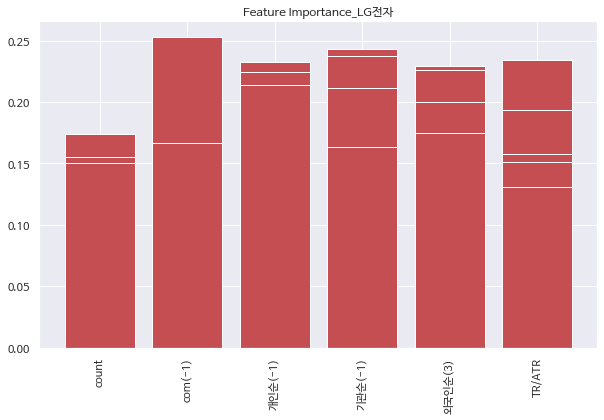

In [ ]:
for t in top20['종목명'][6:20]:
  data = pd.read_csv(path+"합체 데이터/%s_합체.csv" %t).drop(columns = ['Unnamed: 0'])
  df = data.copy()
  # df['Ret'] = df['Close'].pct_change()
  RFdata = df.copy()
  for w in range(-3,4):
    df['com('+str(w)+')'] = df.compound.shift(w)
    df['posneg('+str(w)+')'] = df.posneg.shift(w)
  for k in range(-3,4):
    df['개인순('+str(k)+')'] = df['개인 순매수비율'].shift(k)-df['개인 순매수비율'].shift(k+1)
  for v in range(-3,4):
    df['기관순('+str(v)+')'] = df['기관 순매수비율'].shift(v)-df['기관 순매수비율'].shift(v+1)
  for z in range(-3,4):
    df['외국인순('+str(z)+')'] = df['외국인 순매수비율'].shift(z)-df['외국인 순매수비율'].shift(z+1)
  df0 = df.iloc[:,3]
  df1 = df.iloc[:,25:39]; df11 = pd.concat([df0,df1], axis=1).dropna()
  df2 = df.iloc[:,39:46]; df21 = pd.concat([df0,df2], axis=1).dropna()
  df3 = df.iloc[:,46:53]; df31 = pd.concat([df0,df3], axis=1).dropna()
  df4 = df.iloc[:,53:60]; df41 = pd.concat([df0,df4], axis=1).dropna()

  X = df11.iloc[:,1:]
  y = np.sign(df11['Change']) 

  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1)

  clf_rf = RandomForestClassifier()  # instantiation
  clf_rf.fit(Xtrain, ytrain )   # fitting
  feature_imp = clf_rf.feature_importances_

  feature_imp_series = pd.Series(feature_imp, index=Xtrain.columns)
  feature_imp_series.sort_values(axis=0, ascending=False, inplace=True)
  name1 = list(feature_imp_series.index)
  rate1 = list(feature_imp_series.values)
 
  X2 = df21.iloc[:,1:]
  y2 = np.sign(df21['Change']) 

  Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, y2,test_size = 0.1)

  clf_rf2 = RandomForestClassifier()  # instantiation
  clf_rf2.fit(Xtrain2, ytrain2 )   # fitting
  feature_imp2 = clf_rf2.feature_importances_

  feature_imp_series2 = pd.Series(feature_imp2, index=Xtrain2.columns)
  feature_imp_series2.sort_values(axis=0, ascending=False, inplace=True)
  name2 = list(feature_imp_series2.index)
  rate2 = list(feature_imp_series2.values)
 
  X3 = df31.iloc[:,1:]
  y3 = np.sign(df31['Change']) 

  Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(X3, y3, test_size = 0.1)

  clf_rf3 = RandomForestClassifier()  # instantiation
  clf_rf3.fit(Xtrain3, ytrain3 )   # fitting
  feature_imp3 = clf_rf3.feature_importances_

  feature_imp_series3 = pd.Series(feature_imp3, index=Xtrain3.columns)
  feature_imp_series3.sort_values(axis=0, ascending=False, inplace=True)
  name3 = list(feature_imp_series3.index)
  rate3 = list(feature_imp_series3.values)
 
  X4 = df41.iloc[:,1:]
  y4 = np.sign(df41['Change']) 

  Xtrain4, Xtest4, ytrain4, ytest4 = train_test_split(X4, y4, test_size = 0.1)

  clf_rf4 = RandomForestClassifier()  # instantiation
  clf_rf4.fit(Xtrain4, ytrain4 )   # fitting
  feature_imp4 = clf_rf4.feature_importances_

  feature_imp_series4 = pd.Series(feature_imp4, index=Xtrain4.columns)
  feature_imp_series4.sort_values(axis=0, ascending=False, inplace=True)
  name4 = list(feature_imp_series4.index)
  rate4 = list(feature_imp_series4.values)
  
  print(f'{name1[0]},{name2[0]},{name3[0]},{name4[0]} : {t}_completed')
  r_list = [name1[0],name2[0],name3[0], name4[0]]
  record.insert(loc =0, column = t, value = r_list)

  RFdata[name1[0]] = df[name1[0]]
  RFdata[name2[0]] = df[name2[0]]
  RFdata[name3[0]] = df[name3[0]]
  RFdata[name4[0]] = df[name4[0]]
  RFdata['TR/ATR'] = df['TR']/df['ATR_14']
  RF_copy1 = RFdata.iloc[:,[3,11]]
  RF_copy2 = RFdata.iloc[:,25:]
  RF_df = pd.concat([RF_copy1,RF_copy2], axis = 1).dropna()
# RF_df

  X_rf = RF_df.iloc[:,1:]
  y_rf = np.sign(RF_df['Change']) 

  Xtrain_rf, Xtest_rf, ytrain_rf, ytest_rf = train_test_split(X_rf, y_rf, test_size = 0.1)

  clf_rfc_rf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
  clf_rfc_rf.fit(Xtrain_rf, ytrain_rf)
  yhat_rfc_rf = clf_rfc_rf.predict(Xtest_rf)
  acc = accuracy_score(yhat_rfc_rf, ytest_rf)
  print(f'{t}_RF_accuracy : {acc}\n')
  RF_result[t] = acc

  x_corr = X_rf.corrwith(y_rf)
  x_corr.sort_values(axis = 0, ascending = False)
  display(pd.DataFrame({t: x_corr.sort_values(axis = 0, ascending = False)}))

  feature_imp_rf = clf_rfc_rf.feature_importances_
  feature_imp_series_rf = pd.Series(feature_imp_rf, index=Xtrain_rf.columns)
  feature_imp_series_rf.sort_values(axis=0, ascending=False, inplace=True)

  name_rf = list(feature_imp_series_rf.index)
  rate_rf = list(feature_imp_series_rf.values)
  
  importance_show = pd.DataFrame({'feature':name_rf, 'importance':rate_rf})

  plt.rc('font', family='NanumBarunGothic') 
  plt.rcParams['figure.figsize'] = (10, 6)
  plt.bar(range(len(feature_imp_rf)), feature_imp_rf, color='r')
  plt.xticks(range(len(feature_imp_rf)), Xtrain_rf.columns, rotation='vertical')
  plt.title('Feature Importance_'+t)
  plt.savefig(path+'output_%s.png' %t, bbox_inches='tight')


In [ ]:
# 선택된 변수를 이용한 RF 모형의 Accuracy.

result_show = pd.Series(RF_result)
result_show

삼성전자        0.833333
SK하이닉스      0.769231
삼성바이오로직스    0.800000
NAVER       0.437500
LG화학        0.692308
현대차         0.583333
셀트리온        0.428571
삼성SDI       0.583333
카카오         0.416667
LG생활건강      0.461538
현대모비스       0.500000
삼성물산        0.625000
기아차         0.428571
POSCO       0.923077
엔씨소프트       0.500000
SK텔레콤       0.666667
KB금융        0.500000
신한지주        0.571429
LG전자        0.533333
dtype: float64

In [ ]:
record

,LG전자,신한지주,KB금융,SK텔레콤,엔씨소프트,POSCO,기아차,삼성물산,현대모비스,LG생활건강,카카오,삼성SDI,셀트리온,현대차,LG화학,NAVER,삼성바이오로직스,SK하이닉스,삼성전자
0,com(-1),com(3),com(-2),com(-2),posneg(1),posneg(2),com(2),com(3),posneg(3),com(0),com(-3),com(0),com(3),com(3),com(0),posneg(0),posneg(3),com(-1),com(-2)
1,개인순(-1),개인순(0),개인순(-1),개인순(0),개인순(-3),개인순(0),개인순(0),개인순(0),개인순(-3),개인순(-1),개인순(3),개인순(-2),개인순(2),개인순(-1),개인순(0),개인순(0),개인순(1),개인순(0),개인순(0)
2,기관순(-1),기관순(0),기관순(-1),기관순(-1),기관순(-1),기관순(-1),기관순(-1),기관순(-2),기관순(-1),기관순(-1),기관순(-1),기관순(0),기관순(1),기관순(-1),기관순(-1),기관순(-1),기관순(1),기관순(-2),기관순(-1)
3,외국인순(3),외국인순(2),외국인순(-1),외국인순(0),외국인순(-3),외국인순(3),외국인순(2),외국인순(1),외국인순(-2),외국인순(-1),외국인순(3),외국인순(-1),외국인순(3),외국인순(-1),외국인순(2),외국인순(-1),외국인순(-2),외국인순(0),외국인순(0)


In [ ]:
from google.colab import files

## OLS

In [ ]:
path

'/content/drive/Shareddrives/2020-2 경제학특강4/'

In [ ]:
top20['종목명'][5]

'삼성전자우'

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# from google.colab import files


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
i = 19

In [ ]:
# for i in range(20):
#   if i == 5:
#     continue

t = top20['종목명'][i]
  

data = pd.read_csv(path+"합체 데이터/%s_합체.csv" %t).drop(columns = ['Unnamed: 0'])
data.rename(columns = {'개인 순매수비율' : 'ind_buy', '기관 순매수비율': 'agn_buy', '외국인 순매수비율': 'fegn_buy'}, inplace = True)

C_before = data[data.Date <= '2020-03-19'][['Date', 'compound', 'posneg', 'ind_buy', 'agn_buy', 'fegn_buy']].set_index('Date').dropna()
C_after = data[data.Date > '2020-03-19'][['Date', 'compound', 'posneg', 'ind_buy', 'agn_buy', 'fegn_buy']].set_index('Date').dropna()

if record[t][0][:3] == 'pos': 
  x_before = C_before['posneg']
  x_after = C_after['posneg']
else:
  x_before = C_before['compound']

In [ ]:
 x_after = C_after['compound']

y_before1 = C_before['ind_buy']
# y_before1 = C_before['개인 순매수비율']
y_after1 = C_after['ind_buy']
# y_after1 = C_after['개인 순매수비율']

y_before2 = C_before['agn_buy']
y_after2 = C_after['agn_buy']

y_before3 = C_before['fegn_buy']
y_after3 = C_after['fegn_buy']

                                 OLS Regression Results                                
Dep. Variable:                ind_buy   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.017
Method:                 Least Squares   F-statistic:                            0.07276
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                       0.788
Time:                        12:41:51   Log-Likelihood:                         -244.40
No. Observations:                  56   AIC:                                      490.8
Df Residuals:                      55   BIC:                                      492.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

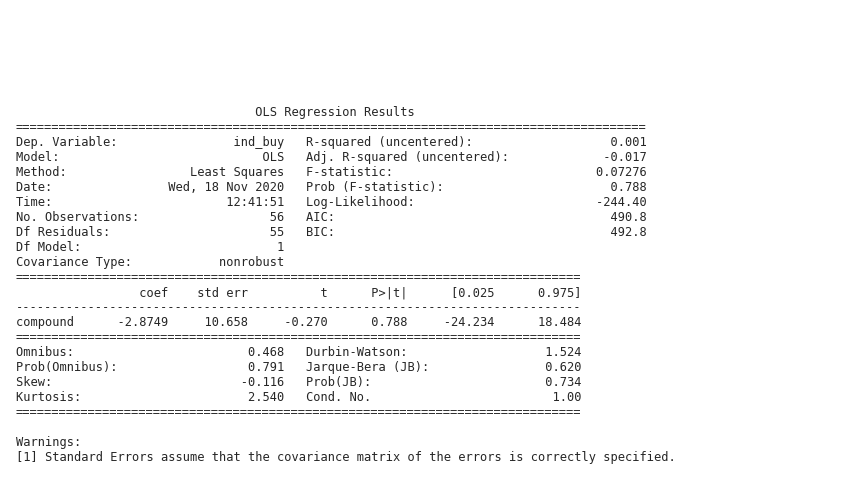

In [ ]:
#######################################

model = sm.OLS(y_before1, x_before)
result1 = model.fit()
print(result1.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result1.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(path+'%s 개인_OLS(%s).png' %(t, "before Feb"))

                                 OLS Regression Results                                
Dep. Variable:                agn_buy   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.017
Method:                 Least Squares   F-statistic:                            0.06940
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                       0.793
Time:                        12:41:52   Log-Likelihood:                         -222.19
No. Observations:                  56   AIC:                                      446.4
Df Residuals:                      55   BIC:                                      448.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

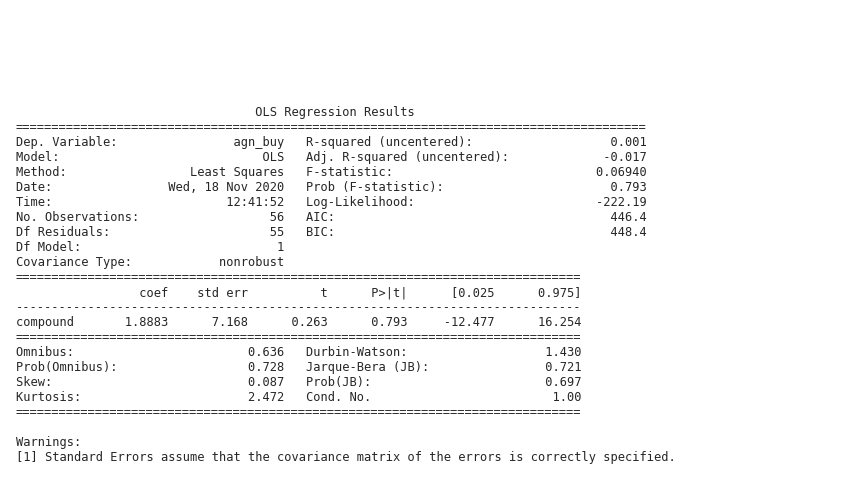

In [ ]:
#########
model = sm.OLS(y_before2, x_before)
result2 = model.fit()
print(result2.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result2.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(path+'%s 기관_OLS(%s).png' %(t, "before Feb"))


                                 OLS Regression Results                                
Dep. Variable:               fegn_buy   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.018
Method:                 Least Squares   F-statistic:                            0.01058
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                       0.918
Time:                        12:41:52   Log-Likelihood:                         -238.51
No. Observations:                  56   AIC:                                      479.0
Df Residuals:                      55   BIC:                                      481.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

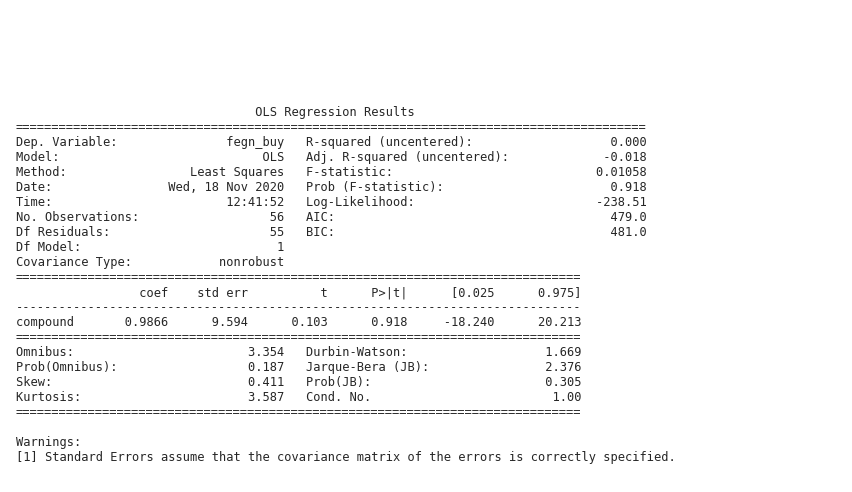

In [ ]:

########
model = sm.OLS(y_before3, x_before)
result3 = model.fit()
print(result3.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result3.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(path+'%s 외국인_OLS(%s).png' %(t, "before Feb"))

                                 OLS Regression Results                                
Dep. Variable:                ind_buy   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              2.477
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                       0.118
Time:                        12:41:53   Log-Likelihood:                         -500.88
No. Observations:                 117   AIC:                                      1004.
Df Residuals:                     116   BIC:                                      1007.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

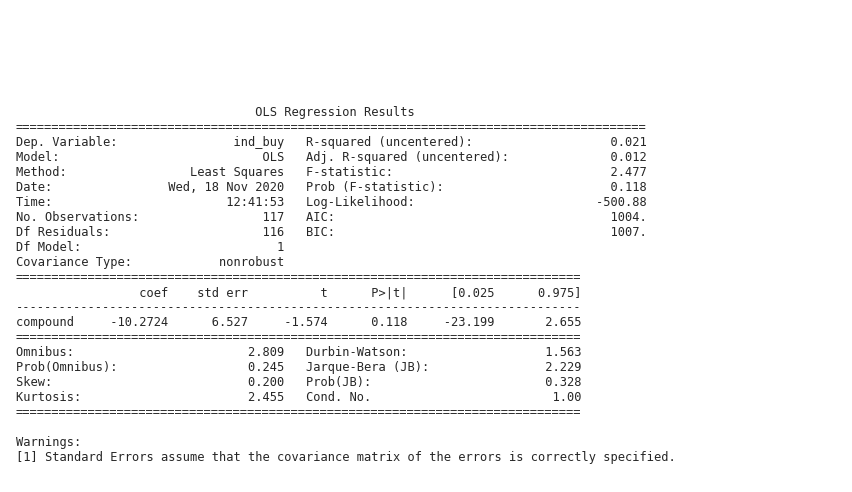

In [ ]:
########################
model = sm.OLS(y_after1, x_after)
result1 = model.fit()
print(result1.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result1.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(path+'%s 개인_OLS(%s).png' %(t, "since Feb"))


                                 OLS Regression Results                                
Dep. Variable:                agn_buy   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.3155
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                       0.575
Time:                        12:41:53   Log-Likelihood:                         -467.98
No. Observations:                 117   AIC:                                      938.0
Df Residuals:                     116   BIC:                                      940.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

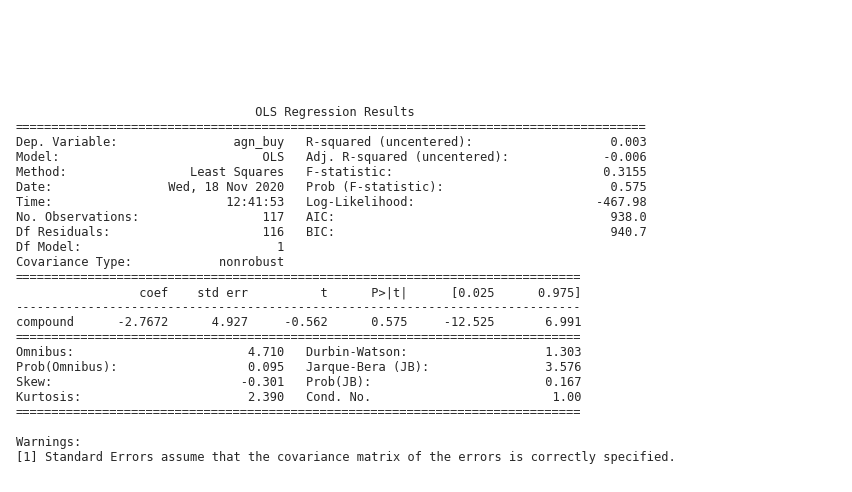

In [ ]:

#########
model = sm.OLS(y_after2, x_after)
result2 = model.fit()
print(result2.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result2.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(path+'%s 기관_OLS(%s).png' %(t, "since Feb"))

                                 OLS Regression Results                                
Dep. Variable:               fegn_buy   R-squared (uncentered):                   0.059
Model:                            OLS   Adj. R-squared (uncentered):              0.051
Method:                 Least Squares   F-statistic:                              7.274
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                     0.00804
Time:                        12:41:54   Log-Likelihood:                         -465.78
No. Observations:                 117   AIC:                                      933.6
Df Residuals:                     116   BIC:                                      936.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

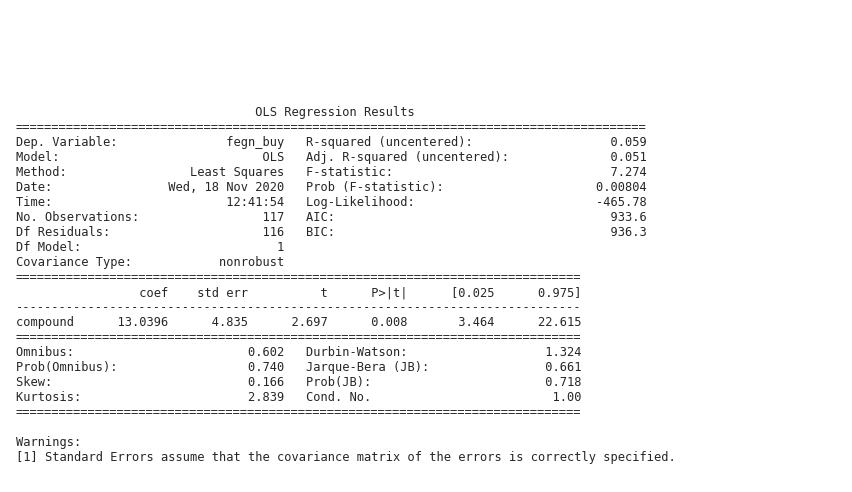

In [ ]:
########
model = sm.OLS(y_after3, x_after)
result3 = model.fit()
print(result3.summary())

plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(result3.summary()), {'fontsize': 12}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig(path+'%s 외국인_OLS(%s).png' %(t, "since Feb"))